✅ Dataset loaded. Shape: (4888, 33)

🔹 Random Forest Performance on Test Data
Accuracy: 0.8967280163599182
Precision: 0.9411764705882353
Recall: 0.5026178010471204
F1 Score: 0.6552901023890785
ROC AUC: 0.7474969564320736

🔹 Decision Tree Performance on Test Data
Accuracy: 0.8997955010224948
Precision: 0.7597765363128491
Recall: 0.7120418848167539
F1 Score: 0.7351351351351352
ROC AUC: 0.8287020097527226


c:\Users\sahus\OneDrive\Desktop\Complete Data Science\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Logistic Regression Performance on Test Data
Accuracy: 0.8302658486707567
Precision: 0.6506024096385542
Recall: 0.28272251308900526
F1 Score: 0.39416058394160586
ROC AUC: 0.6229368601023171
Fitting 3 folds for each of 100 candidates, totalling 300 fits

✅ Best Parameters Found: {'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}

🔹 Tuned Random Forest Performance
Accuracy: 0.911042944785276
Precision: 0.9333333333333333
Recall: 0.5863874345549738
F1 Score: 0.7202572347266881
ROC AUC: 0.7881111251555046


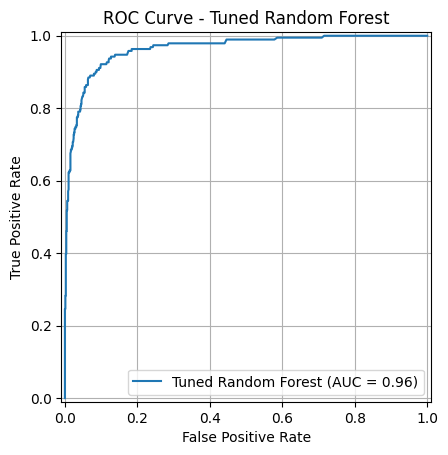

In [ ]:
# 📌 1. Import Libraries
# Start with all the necessary imports:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, RocCurveDisplay
)

# 📌 2. Load the Cleaned Dataset
 
# Load the cleaned dataset
df = pd.read_csv('Travel_cleaned.csv')
print("✅ Dataset loaded. Shape:", df.shape)
df.head()
# | Row | ProdTaken | Age  | CityTier | DurationOfPitch | #Visitors | #Followups | StarPref | #Trips | Passport | PitchScore | ... | SuperDeluxe | Married | Single | Unmarried | Executive | Manager | SrManager | VP | Income/Person | ChildRatio |
# | --- | --------- | ---- | -------- | --------------- | --------- | ---------- | -------- | ------ | -------- | ---------- | --- | ----------- | ------- | ------ | --------- | --------- | ------- | --------- | -- | ------------- | ---------- |
# | 0   | 1         | 41.0 | 3        | 6.0             | 3         | 3.0        | 3.0      | 1.0    | 1        | 2          | ... | 0           | 0       | 1      | 0         | 0         | 1       | 0         | 0  | 20993.0       | 0.0        |
# | 1   | 0         | 49.0 | 1        | 14.0            | 3         | 4.0        | 4.0      | 2.0    | 0        | 3          | ... | 0           | 0       | 0      | 0         | 0         | 1       | 0         | 0  | 6710.0        | 1.0        |
# | 2   | 1         | 37.0 | 1        | 8.0             | 3         | 4.0        | 3.0      | 7.0    | 1        | 3          | ... | 0           | 0       | 1      | 0         | 1         | 0       | 0         | 0  | 17090.0       | 0.0        |
# | 3   | 0         | 33.0 | 1        | 9.0             | 2         | 3.0        | 3.0      | 2.0    | 1        | 5          | ... | 0           | 0       | 0      | 0         | 1         | 0       | 0         | 0  | 8954.5        | 0.5        |
# | 4   | 0         | 36.0 | 1        | 8.0             | 2         | 3.0        | 4.0      | 1.0    | 0        | 5          | ... | 0           | 0       | 0      | 0         | 1         | 0       | 0         | 0  | 18468.0       | 0.0        |


# 📌 3. Define Features and Target
 
# Define X (features) and y (target)
X = df.drop('ProdTaken', axis=1)  # Replace with your actual target column
y = df['ProdTaken']

X.head()
# | Row | Age  | CityTier | PitchDuration | #Visitors | #Followups | StarPref | #Trips | Passport | PitchScore | OwnCar | ... | SuperDeluxe | Married | Single | Unmarried | Executive | Manager | SrManager | VP | Income/Person | ChildrenRatio |
# | --- | ---- | -------- | ------------- | --------- | ---------- | -------- | ------ | -------- | ---------- | ------ | --- | ----------- | ------- | ------ | --------- | --------- | ------- | --------- | -- | ------------- | ------------- |
# | 0   | 41.0 | 3        | 6.0           | 3         | 3.0        | 3.0      | 1.0    | 1        | 2          | 1      | ... | 0           | 0       | 1      | 0         | 0         | 1       | 0         | 0  | 20993.0       | 0.0           |
# | 1   | 49.0 | 1        | 14.0          | 3         | 4.0        | 4.0      | 2.0    | 0        | 3          | 1      | ... | 0           | 0       | 0      | 0         | 0         | 1       | 0         | 0  | 6710.0        | 1.0           |
# | 2   | 37.0 | 1        | 8.0           | 3         | 4.0        | 3.0      | 7.0    | 1        | 3          | 0      | ... | 0           | 0       | 1      | 0         | 1         | 0       | 0         | 0  | 17090.0       | 0.0           |
# | 3   | 33.0 | 1        | 9.0           | 2         | 3.0        | 3.0      | 2.0    | 1        | 5          | 1      | ... | 0           | 0       | 0      | 0         | 1         | 0       | 0         | 0  | 8954.5        | 0.5           |
# | 4   | 36.0 | 1        | 8.0           | 2         | 3.0        | 4.0      | 1.0    | 0        | 5          | 1      | ... | 0           | 0       | 0      | 0         | 1         | 0       | 0         | 0  | 18468.0       | 0.0           |

y.head()
# 0    1
# 1    0
# 2    1
# 3    0
# 4    0
# Name: ProdTaken, dtype: int64

# 📌 4. Split Data into Train and Test Sets
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 📌 5. Initialize and Train Models
 
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    
    print(f"\n🔹 {name} Performance on Test Data")
    print("Accuracy:", accuracy_score(y_test, y_pred_test))
    print("Precision:", precision_score(y_test, y_pred_test))
    print("Recall:", recall_score(y_test, y_pred_test))
    print("F1 Score:", f1_score(y_test, y_pred_test))
    print("ROC AUC:", roc_auc_score(y_test, y_pred_test))

    # ✅ Dataset loaded. Shape: (4888, 33)

# 🔹 Random Forest Performance on Test Data
# Accuracy: 0.901840490797546
# Precision: 0.9611650485436893
# Recall: 0.518324607329843
# F1 Score: 0.673469387755102
# ROC AUC: 0.7566210076039305

# 🔹 Decision Tree Performance on Test Data
# Accuracy: 0.8967280163599182
# Precision: 0.7445652173913043
# Recall: 0.7172774869109948
# F1 Score: 0.7306666666666667
# ROC AUC: 0.8287785147388519

# 🔹 Logistic Regression Performance on Test Data
# Accuracy: 0.8302658486707567
# Precision: 0.6506024096385542
# Recall: 0.28272251308900526
# F1 Score: 0.39416058394160586
# ROC AUC: 0.6229368601023171

# 📌 6. Hyperparameter Tuning: Random Forest
 
rf_params = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'max_features': [5, 7, 'sqrt'],
    'min_samples_split': [2, 5, 10],
}

rf = RandomForestClassifier(random_state=42)

rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_params,
    n_iter=100,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

rf_random_search.fit(X_train, y_train)
print("\n✅ Best Parameters Found:", rf_random_search.best_params_)

# ✅ Best Parameters Found: {'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}

# 📌 7. Train the Best Model Again
 
best_rf = rf_random_search.best_estimator_
best_rf.fit(X_train, y_train)
y_best_pred = best_rf.predict(X_test)

print("\n🔹 Tuned Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_best_pred))
print("Precision:", precision_score(y_test, y_best_pred))
print("Recall:", recall_score(y_test, y_best_pred))
print("F1 Score:", f1_score(y_test, y_best_pred))
print("ROC AUC:", roc_auc_score(y_test, y_best_pred))
# 🔹 Tuned Random Forest Performance
# Accuracy: 0.911042944785276
# Precision: 0.9333333333333333
# Recall: 0.5863874345549738
# F1 Score: 0.7202572347266881
# ROC AUC: 0.7881111251555046

# 📌 8. Plot ROC Curve
 
y_prob = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(y_test, y_prob),
                estimator_name="Tuned Random Forest").plot()
plt.title("ROC Curve - Tuned Random Forest")
plt.grid(True)
plt.show()

